In [82]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler# escalamiento a los datos para que los valores se ajusten a ello
from sklearn.linear_model import LinearRegression # modelo de regresión lineal

### Regresión Polinómica

In [84]:
pos = [x for x in range(1,11)]
post = [
    'Pasante de desarrollo',
    'Desarrollador junior',
    'Desarrollador semi-senior',
    'Desarrollador senior',
    'Lider de proyecto',
    'Gerente de proyecto',
    'Gerente de desarrollo',
    'Gerente de sistemas',
    'Director de sistemas',
    'Director Ejecutivo (CEO)'
]
salary = [1200.0, 2500.0, 4000.0, 4800.0, 6500.0, 9000.0, 12820.0, 15000.0, 25000.0, 50000.0]

In [85]:
data = {
    'position':post,
    'years': pos,
    'salary': salary
}
data = pd.DataFrame(data)
data.head()

,position,years,salary
0,Pasante de desarrollo,1,1200.0
1,Desarrollador junior,2,2500.0
2,Desarrollador semi-senior,3,4000.0
3,Desarrollador senior,4,4800.0
4,Lider de proyecto,5,6500.0


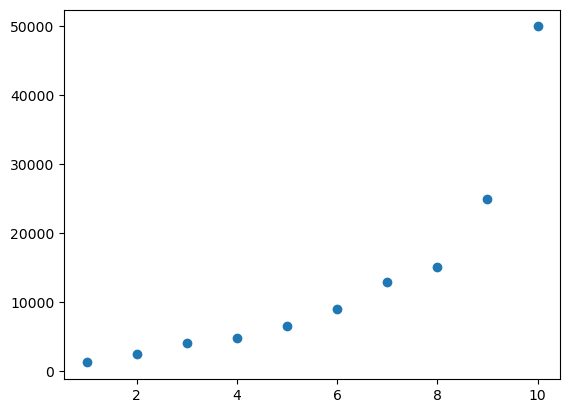

In [86]:
plt.scatter(data['years'], data['salary']);

In [87]:
input = data.iloc[:,1].values.reshape(-1,1)
target = data.iloc[:,-1].values

debido a que solo tenemos 10 datos, lo mejor que podemos hacer es usar todos los valores para el entrenamiento

In [88]:
regression = LinearRegression()
regression.fit(input, target)

LinearRegression()

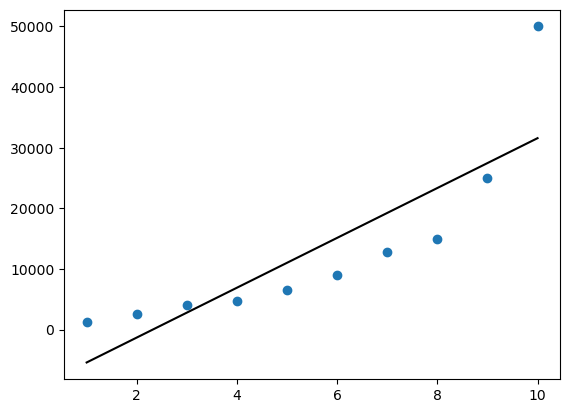

In [89]:
plt.scatter(data['years'], data['salary']);
plt.plot(input, regression.predict(input), color='black');

In [90]:
regression.predict([[2.5]])

array([750.])

### Modelo polinómico

In [91]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=4)

input_poly = poly.fit_transform(input)
input_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [92]:
regression = LinearRegression()
regression.fit(input_poly, target)

LinearRegression()

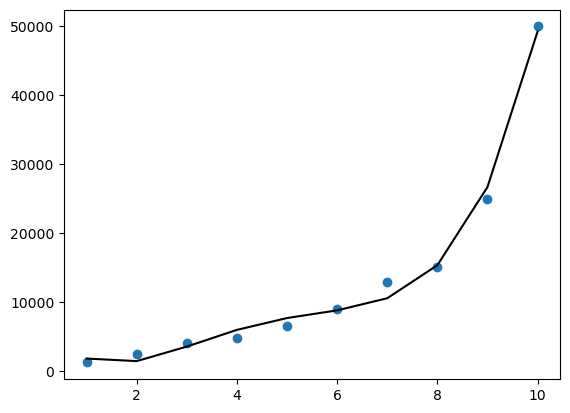

In [93]:
plt.scatter(data['years'], data['salary']);
plt.plot(input, regression.predict(input_poly), color='black');

In [94]:
predict = poly.fit_transform([[1]])
regression.predict(predict)

array([1768.88111889])

In [95]:
from sklearn.metrics import r2_score

r2_score(target, regression.predict(input_poly))


0.993318636690711

### Support vector machine (SVR)

In [96]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [97]:
data = pd.read_csv('../../data/raw/Advertising.csv')
data = data.iloc[:,1:]

In [98]:
inputs = data.drop(['Radio', 'Sales'], axis=1).values # independiente newspapaer y TV
target = data['Sales'].values # dependiente

In [99]:
inputs_train, inputs_test, target_train, target_test = train_test_split(
    inputs, 
    target, 
    test_size=0.2, 
    random_state=42
)

In [100]:
svr = SVR(kernel='rbf')
svr.fit(inputs_train, target_train)

SVR()

In [101]:
target_pred = svr.predict(inputs_test)
print('Reales: ', target_test[:4], 'Predicción: ', target_pred[:4])

Reales:  [16.9 22.4 21.4  7.3] Predicción:  [15.92644542 17.19547972 18.032271    8.22924309]


In [102]:
r2_score(target_test, target_pred)

0.6656952068341743

In [103]:
inputs = data.drop(['Newspaper', 'Sales'], axis=1).values # independiente newspapaer y TV
target = data['Sales'].values # dependiente

In [104]:
inputs_train, inputs_test, target_train, target_test = train_test_split(
    inputs, 
    target, 
    test_size=0.2, 
    random_state=42
)

In [105]:
svr = SVR(kernel='rbf')
svr.fit(inputs_train, target_train)

SVR()

In [106]:
target_pred = svr.predict(inputs_test)
print('Reales: ', target_test[:4], 'Predicción: ', target_pred[:4])

Reales:  [16.9 22.4 21.4  7.3] Predicción:  [16.25106175 19.54842936 18.32663294  8.51097891]


In [107]:
r2_score(target_test, target_pred)

0.8989271754336223